# 1. Loading Dataset

## 1.1. Load a dataset and introduce missingness

Dataset used: Breast Cancer Dataset http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

### 1.1.1. Load the dataset and store it as dataframe(numeric)

In [1]:
# For implementation on cluster
import torch
torch.multiprocessing.set_start_method("spawn")

In [2]:
import pandas as pd
import utils

In [3]:
#Test
filename = "data/breast_cancer/breast_cancer_data.csv"
df = utils.get_dataframe_from_csv(filename, header_row = None, sep=',').iloc[:, 1:]
df = df.convert_objects(convert_numeric=True)
df1 = df.copy()
#df = utils.get_dataframe_from_csv(filename, header_row=0, sep=',').iloc[:,:-1]  #remove label

INFO:root:Input filename has to be space separated data
C:\Users\asree\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [11]:
df.isna().sum()

1      0
2      0
3      0
4      0
5      0
6     16
7      0
8      0
9      0
10     0
dtype: int64

### 1.1.2. Inducing missingness

After dataset loading, start with inducing missingness. 

To start off, introduce simple random missing patterns (Missing Completely At Random), i.e. sample half of the variables and set observations in those variables to missing if an appended random uniform vector has value less than a certain threshhold. WIth threshold of 0.2, the procedure should introduce about 20% missingness.

In [4]:
df2 = utils.induce_missingness(df1,logger_level=20)

INFO:root: Returning new dataframe with missingness(MCAR) induced
INFO:root: Percentage of NaNs in returned dataframe : 10.31


In [7]:
df1.head()

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [6]:
df2.head()

,1,2,3,4,5,6,7,8,9,10
0,NaN,1,NaN,1,NaN,1.0,3,NaN,1,NaN
1,5.0,4,4.0,5,7.0,10.0,3,2.0,1,2.0
2,3.0,1,1.0,1,2.0,2.0,3,1.0,1,2.0
3,6.0,8,8.0,1,3.0,4.0,3,7.0,1,2.0
4,4.0,1,1.0,3,2.0,1.0,3,1.0,1,2.0


In [6]:
df.dtypes, df1.dtypes, df2.dtypes

(1       int64
 2       int64
 3       int64
 4       int64
 5       int64
 6     float64
 7       int64
 8       int64
 9       int64
 10      int64
 dtype: object, 1       int64
 2       int64
 3       int64
 4       int64
 5       int64
 6     float64
 7       int64
 8       int64
 9       int64
 10      int64
 dtype: object, 1     float64
 2       int64
 3     float64
 4       int64
 5     float64
 6     float64
 7       int64
 8     float64
 9       int64
 10    float64
 dtype: object)

In [7]:
df2.head(20)

,1,2,3,4,5,6,7,8,9,10
0,NaN,1,NaN,1,NaN,1.0,3,NaN,1,NaN
1,5.0,4,4.0,5,7.0,10.0,3,2.0,1,2.0
2,3.0,1,1.0,1,2.0,2.0,3,1.0,1,2.0
3,6.0,8,8.0,1,3.0,4.0,3,7.0,1,2.0
4,4.0,1,1.0,3,2.0,1.0,3,1.0,1,2.0
5,8.0,10,10.0,8,7.0,10.0,9,7.0,1,4.0
6,1.0,1,1.0,1,2.0,10.0,3,1.0,1,2.0
7,2.0,1,2.0,1,2.0,1.0,3,1.0,1,2.0
8,2.0,1,1.0,1,2.0,1.0,1,1.0,5,2.0
9,4.0,2,1.0,1,2.0,1.0,2,1.0,1,2.0


### 1.1.3. Create Train-Test split

Create 70% training data and 30%  test data which includes missingness and a test data without missingness so we can calculate performance. 

In [8]:
#Test
train_df, test_df, full_test_df = utils.create_train_test_split(dataframe=df1, test_perc=0.3, logger_level=20)
# print(train_df.head())
print(test_df.head(20))
print(full_test_df.head(20))

INFO:root: Returning new dataframe with missingness(MCAR) induced
INFO:root: Percentage of NaNs in returned dataframe : 10.31
INFO:root: Returning train_df, test_df, full_test_df after splitting dataframe in 0.7/0.3 split 
INFO:root: Note: full_test_df is the same as test_df but without NaNs


       1   2     3   4     5     6   7     8   9    10
50    9.0   5   8.0   1   2.0   3.0   2   1.0   5  4.0
444   5.0   1   1.0   6   3.0   1.0   2   1.0   1  2.0
43    NaN   6   NaN   6   NaN   1.0   3   NaN   1  NaN
139   1.0   1   1.0   1   1.0   NaN   2   1.0   1  2.0
692   3.0   1   1.0   1   2.0   1.0   1   1.0   1  2.0
219   6.0   1   3.0   1   2.0   1.0   3   1.0   1  2.0
141   2.0   1   1.0   1   2.0   1.0   1   1.0   1  2.0
198   1.0   1   1.0   1   2.0   1.0   1   1.0   1  2.0
312   8.0   6   4.0  10  10.0   1.0   3   5.0   1  4.0
394   1.0   2   3.0   1   2.0   1.0   2   1.0   1  2.0
20    7.0   3   2.0  10   5.0  10.0   5   4.0   4  4.0
276   3.0   1   1.0   1   2.0   1.0   2   1.0   1  2.0
16    4.0   1   1.0   1   2.0   1.0   2   1.0   1  2.0
261   5.0  10  10.0   6  10.0  10.0  10   6.0   5  4.0
6     1.0   1   1.0   1   2.0  10.0   3   1.0   1  2.0
671   3.0   2   1.0   2   2.0   1.0   3   1.0   1  2.0
221  10.0   6   4.0   3  10.0  10.0   9  10.0   1  4.0
655   3.0 

In [9]:
full_test_df.isna().sum()

1     0
2     0
3     0
4     0
5     0
6     4
7     0
8     0
9     0
10    0
dtype: int64

# 2. Modelling

Proceed to modelling.

In R:
Start with initializing 'h2o' package and then reading the training and test datasets as the 'h2o's supported format.
Then run imputation model multiple times as each new start would initialize the weights with different values.<br>
Info at: <br>
[h2o](https://cran.r-project.org/web/packages/h2o/h2o.pdf) package offers an easy to use function for implementing autoencoders. 
More information is available at this [link](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/booklets/DeepLearningBooklet.pdf).

In Python: Using PyTorch to create the DAE, and train using the Adam optimizer from PyTorch

In [9]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.functional as F

In [10]:
#Settings for device, randomization seed, default tensor type, kwargs for memory #DevSeedTensKwargs
RANDOM_SEED = 18
np.random.seed(RANDOM_SEED)

if torch.cuda.is_available():
    device = 'cuda'
    torch.cuda.manual_seed(RANDOM_SEED)
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    kwargs = {'num_workers':4, 'pin_memory' :True}
else:
    device = 'cpu'
    torch.manual_seed(RANDOM_SEED)
    torch.set_default_tensor_type(torch.FloatTensor)
    kwards = {}

In [11]:
import dataset_module

In [12]:
trainset = dataset_module.DataSetForImputation(train_df, normalize=True)  #normalize True for [0,1] normalization for dataframe

In [13]:
len(trainset)

489

In [14]:
import Modelling

In [15]:
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()))

In [16]:
net

DenoisingAutoEncoder(
  (drop_layer): Dropout(p=0.5)
  (linear_layer_list): ModuleList(
    (0): Linear(in_features=10, out_features=17, bias=True)
    (1): Linear(in_features=17, out_features=24, bias=True)
    (2): Linear(in_features=24, out_features=31, bias=True)
    (3): Linear(in_features=31, out_features=24, bias=True)
    (4): Linear(in_features=24, out_features=17, bias=True)
    (5): Linear(in_features=17, out_features=10, bias=True)
  )
)

# 3. Training

In [17]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
BATCHES = DATAPOINTS/BATCH_SIZE
VARIABLES  = len(trainset.variables()) #9


import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 7, input_dropout=0.5)

criterion = nn.MSELoss()
net = net.to(device) 

trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [18]:

import os
from tqdm import tqdm_notebook as tqdm
def train_model(start_steps = 0, end_steps = 5, net=None, model_name = "DAE_Arch_N_7_ImputeOnlyNaNs_WithDropout", train_loader = train_loader, val_loader = val_loader, logger_level = 20):
    import logging
    logger = logging.getLogger()
    logger.setLevel(logger_level)

    NaN_flag = False
    
    for epoch in tqdm(range(start_steps, end_steps)):
        count = epoch-start_steps+1
        net.train()
        #Epoch begins
        epoch_loss = 0.0
        for x, d in tqdm(train_loader):
            # Normalize between [0,1] for better convergence 
            original_x = x
            x[torch.isnan(x)]=0   #If an entire column is zero, division by 0, replace NaNs with zero
            d[torch.isnan(d)]=0 

            optimizer.zero_grad()
            x = x.to(device)
            with torch.no_grad():
                d = d.to(device)
            y = net(x)
            loss = torch.sqrt(criterion(y, d))   #RMSE Loss   
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            
            #Break if NaN encountered
            if torch.isnan(loss) or torch.isinf(loss):
                logging.info(f"Loss value: {loss.item()}")
                logging.info("NaN/inf occured at:")
                logging.info(f"{x}\n")
                logging.info(f"{d}\n")
                logging.info(f"Original x was : {original_x}")
                NaN_flag = True
                break

            logging.debug(f"Count: {count}, Loss :{loss}")
            
        if NaN_flag: break   #Stop training if NaN encountered
        
        #Print to screen every few epochs    
        if count%LOG_INTERVAL == 0:
            print(f"Epoch number:{epoch} Loss: {epoch_loss:.4f}")  
            
        #Training artifacts
        if model_name not in os.listdir():
            os.makedirs(model_name+"/artifacts/saved_model/")

        #Write to loss file every epoch
        with open(model_name+"/artifacts/loss_curve",mode = 'a+') as f:
            f.write(f"Epoch_number: {epoch} Loss: {epoch_loss:.4f}\n")
            
        #Validation curve
        val_loss = 0.0
        net.eval()
        for x,d in val_loader:
            x[torch.isnan(x)]=0
            d[torch.isnan(d)]=0
            x = x.to(device)
            with torch.no_grad():
                d= d.to(device)
            y = net(x)
            loss = torch.sqrt(criterion(y,d))
            val_loss+=loss
        net.train()
        #Write Val loss to file every epoch
        with open(model_name+"/artifacts/val_loss_curve",mode = 'a+') as f:
            f.write(f"Epoch_number: {epoch} Loss: {val_loss:.4f}\n")
        
        #Save model every few epochs
        if epoch%SAVE_INTERVAL== 0:
            torch.save(net.state_dict(),f"./{model_name}/artifacts/saved_model/model_at_epoch{epoch}")
        #Epoch Ends

In [19]:
model_name = "Breast_Cancer__Dataset__DAE_Arch_N_7_ImputeOnlyNaNs_WithDropout"

In [20]:
train_model(0,101, net, model_name, train_loader=train_loader, val_loader=val_loader)

Epoch number:9 Loss: 0.4008


Epoch number:19 Loss: 0.3480


Epoch number:29 Loss: 0.3058


Epoch number:39 Loss: 0.2795


Epoch number:49 Loss: 0.2512


Epoch number:59 Loss: 0.2253


Epoch number:69 Loss: 0.2143


Epoch number:79 Loss: 0.2164


Epoch number:89 Loss: 0.2085


Epoch number:99 Loss: 0.2018


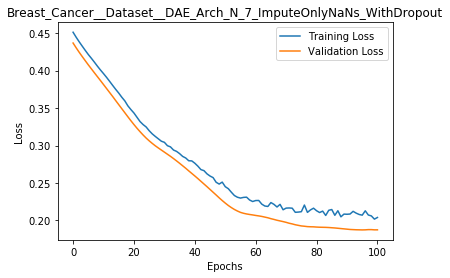

In [22]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")


In [170]:
# '''Remove folder before training again'''
# import shutil
# shutil.rmtree(model_name)

In [ ]:
# Saving model

#torch.save(optimizer.state_dict(), filename)
#optimizer.load_state_dict(torch.load(filename))

# Modelling Loading from saved point

# model =  Modelling.DenoisingAutoEncoder(len(trainset.variables()))
# model.load_state_dict(torch.load("./artifacts/saved_model_epoch50"))
# model.eval()

In [ ]:
#Tweaking the learning rate to improve convergence speed
# optimizer = Adam(net.parameters(), LR)

# 4. Testing

In [23]:
net = net.eval()
print((net(trainset[0][0]).detach()))
print(trainset[0][0])

tensor([ 0.2452,  0.0168,  0.0479,  0.0048,  0.1305,  0.0155,  0.1017,  0.0425,
        -0.0049,  0.0692])
tensor([0.4444, 0.0000, 0.0000, 0.0000, 0.1111, 0.0000, 0.2222, 0.0000, 0.0000,
        0.0000])


In [24]:
net = net.eval()
print(trainset.get_denormalized_data((net(trainset[0][0].detach()))))
print(trainset.get_denormalized_data(trainset[0][0]))

         1         2         3         4         5         6         7   \
0  3.207137  1.151481  1.430845  1.042859  2.174488  1.139472  1.915441   

         8         9         10  
0  1.382512  0.955533  2.138342  
    1    2    3    4    5    6    7    8    9    10
0  5.0  1.0  1.0  1.0  2.0  1.0  3.0  1.0  1.0  2.0


In [25]:
import pandas as pd
import torch
def test_model(net=None, test_df= None, trainset=None, device =None, logger_level=20):
    """
    Function to evaluate the model on test set
    Should meet the following requirements:
        :-trainset - should be an object of class DataSetForImputation
        :-test_df - should be a Pandas dataframe with NaNs (if there are no NaNs, the same will be returned)
        :-net - should be an object of DenoisingAutoEncoder
    """
    assert isinstance(net, Modelling.DenoisingAutoEncoder)
    assert isinstance(test_df, pd.DataFrame)
    assert isinstance(trainset, dataset_module.DataSetForImputation)
    
    import logging
    logger = logging.getLogger()
    logger.setLevel(logger_level)
    
    NaN_test_df = test_df.reset_index(drop=True)  #Dropping index so that everything is reindexed from 0
       
    test_df = test_df.apply(lambda x: x.fillna(x.mean()), axis=0)
    test_df_norm = (test_df- trainset.min_df)/(trainset.max_df-trainset.min_df)
    test_df_tensor = torch.tensor(test_df_norm.values).to(device)
        
    net = net.eval()
    logging.debug(f"{test_df_tensor.shape}")
    pred = net(test_df_tensor)
     
    pred =  trainset.get_denormalized_data(pred)  #Predicted dataframe from the mode    
    
    # Replace the NaNs in the original test_df with newly imputed values
    final_pred = NaN_test_df.where(~NaN_test_df.isna(), other = pred)
    logging.debug(f"final_pred:\n {final_pred.head()}")
    
    return final_pred

In [26]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head(20)

,1,2,3,4,5,6,7,8,9,10
0,9.000000,5,8.000000,1,2.000000,3.000000,2,1.000000,5,4.000000
1,5.000000,1,1.000000,6,3.000000,1.000000,2,1.000000,1,2.000000
2,5.985645,6,4.797505,6,4.138413,1.000000,3,4.377558,1,3.230431
3,1.000000,1,1.000000,1,1.000000,1.384817,2,1.000000,1,2.000000
4,3.000000,1,1.000000,1,2.000000,1.000000,1,1.000000,1,2.000000
5,6.000000,1,3.000000,1,2.000000,1.000000,3,1.000000,1,2.000000
6,2.000000,1,1.000000,1,2.000000,1.000000,1,1.000000,1,2.000000
7,1.000000,1,1.000000,1,2.000000,1.000000,1,1.000000,1,2.000000
8,8.000000,6,4.000000,10,10.000000,1.000000,3,5.000000,1,4.000000
9,1.000000,2,3.000000,1,2.000000,1.000000,2,1.000000,1,2.000000


In [27]:
full_test_df.head(20)

,1,2,3,4,5,6,7,8,9,10
50,9,5,8,1,2,3.0,2,1,5,4
444,5,1,1,6,3,1.0,2,1,1,2
43,5,6,5,6,10,1.0,3,1,1,4
139,1,1,1,1,1,NaN,2,1,1,2
692,3,1,1,1,2,1.0,1,1,1,2
219,6,1,3,1,2,1.0,3,1,1,2
141,2,1,1,1,2,1.0,1,1,1,2
198,1,1,1,1,2,1.0,1,1,1,2
312,8,6,4,10,10,1.0,3,5,1,4
394,1,2,3,1,2,1.0,2,1,1,2


In [28]:
test_df.head(20)

,1,2,3,4,5,6,7,8,9,10
50,9.0,5,8.0,1,2.0,3.0,2,1.0,5,4.0
444,5.0,1,1.0,6,3.0,1.0,2,1.0,1,2.0
43,NaN,6,NaN,6,NaN,1.0,3,NaN,1,NaN
139,1.0,1,1.0,1,1.0,NaN,2,1.0,1,2.0
692,3.0,1,1.0,1,2.0,1.0,1,1.0,1,2.0
219,6.0,1,3.0,1,2.0,1.0,3,1.0,1,2.0
141,2.0,1,1.0,1,2.0,1.0,1,1.0,1,2.0
198,1.0,1,1.0,1,2.0,1.0,1,1.0,1,2.0
312,8.0,6,4.0,10,10.0,1.0,3,5.0,1,4.0
394,1.0,2,3.0,1,2.0,1.0,2,1.0,1,2.0


# 5. Plotting Loss Curve

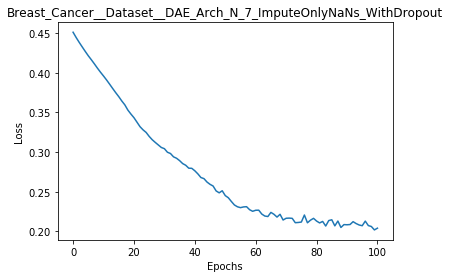

In [29]:
utils.plot_loss_curve(filename= f"{model_name}/artifacts/loss_curve", title=f"{model_name}")

### Model 2 DAE_Arch_N_7_ImputeOnlyNaNs_With10PercentDropout

In [30]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
BATCHES = DATAPOINTS/BATCH_SIZE
VARIABLES  = len(trainset.variables()) #9


import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 7, input_dropout=0.1)

criterion = nn.MSELoss()
net = net.to(device) 

trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [30]:
model_name = "Breast_Cancer_Dataset__DAE_Arch_N_7_ImputeOnlyNaNs_With10PercentDropout"

In [31]:
train_model(0,101, net, model_name, train_loader=train_loader, val_loader=val_loader)

Epoch number:9 Loss: 0.2019


Epoch number:19 Loss: 0.2004


Epoch number:29 Loss: 0.2049


Epoch number:39 Loss: 0.2034


Epoch number:49 Loss: 0.2045


Epoch number:59 Loss: 0.2024


Epoch number:69 Loss: 0.2019


Epoch number:79 Loss: 0.1949


Epoch number:89 Loss: 0.1941


Epoch number:99 Loss: 0.2007


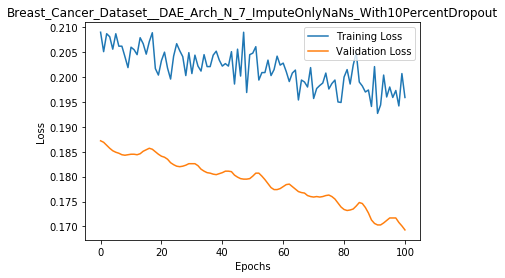

In [32]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")

In [33]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head()

,1,2,3,4,5,6,7,8,9,10
0,9.000000,5,8.000000,1,2.000000,3.000000,2,1.000000,5,4.000000
1,5.000000,1,1.000000,6,3.000000,1.000000,2,1.000000,1,2.000000
2,5.541632,6,4.458457,6,3.840767,1.000000,3,3.792472,1,3.100351
3,1.000000,1,1.000000,1,1.000000,1.772881,2,1.000000,1,2.000000
4,3.000000,1,1.000000,1,2.000000,1.000000,1,1.000000,1,2.000000


In [34]:
full_test_df.head()

,1,2,3,4,5,6,7,8,9,10
50,9,5,8,1,2,3.0,2,1,5,4
444,5,1,1,6,3,1.0,2,1,1,2
43,5,6,5,6,10,1.0,3,1,1,4
139,1,1,1,1,1,NaN,2,1,1,2
692,3,1,1,1,2,1.0,1,1,1,2


### Model 3 DAE_Arch_N_7_ImputeOnlyNaNs_WithNoDropout

In [35]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
BATCHES = DATAPOINTS/BATCH_SIZE
VARIABLES  = len(trainset.variables()) #9


import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 7, input_dropout=0.0)

criterion = nn.MSELoss()
net = net.to(device) 

trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [36]:
model_name = "Breast_Cancer_Dataset__DAE_Arch_N_7_ImputeOnlyNaNs_WithNoDropout"

In [37]:
train_model(0,101, net, model_name)

Epoch number:9 Loss: 0.3895


Epoch number:19 Loss: 0.3361


Epoch number:29 Loss: 0.2876


Epoch number:39 Loss: 0.2408


Epoch number:49 Loss: 0.1971


Epoch number:59 Loss: 0.1928


Epoch number:69 Loss: 0.1869


Epoch number:79 Loss: 0.1826


Epoch number:89 Loss: 0.1801


Epoch number:99 Loss: 0.1780


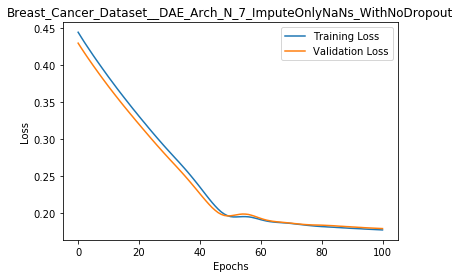

In [38]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")

In [39]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head()

,1,2,3,4,5,6,7,8,9,10
0,9.000000,5,8.000000,1,2.000000,3.000000,2,1.000000,5,4.000000
1,5.000000,1,1.000000,6,3.000000,1.000000,2,1.000000,1,2.000000
2,5.182241,6,4.102636,6,3.949195,1.000000,3,3.978181,1,2.998697
3,1.000000,1,1.000000,1,1.000000,1.249902,2,1.000000,1,2.000000
4,3.000000,1,1.000000,1,2.000000,1.000000,1,1.000000,1,2.000000


In [40]:
full_test_df.head() 

,1,2,3,4,5,6,7,8,9,10
50,9,5,8,1,2,3.0,2,1,5,4
444,5,1,1,6,3,1.0,2,1,1,2
43,5,6,5,6,10,1.0,3,1,1,4
139,1,1,1,1,1,NaN,2,1,1,2
692,3,1,1,1,2,1.0,1,1,1,2


In [41]:
test_df.head()

,1,2,3,4,5,6,7,8,9,10
50,9.0,5,8.0,1,2.0,3.0,2,1.0,5,4.0
444,5.0,1,1.0,6,3.0,1.0,2,1.0,1,2.0
43,NaN,6,NaN,6,NaN,1.0,3,NaN,1,NaN
139,1.0,1,1.0,1,1.0,NaN,2,1.0,1,2.0
692,3.0,1,1.0,1,2.0,1.0,1,1.0,1,2.0


### Model 4 DAE_Arch_N_3_ImputeOnlyNaNs_WithDropout

In [42]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
BATCHES = DATAPOINTS/BATCH_SIZE
VARIABLES  = len(trainset.variables()) #9


import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 3, input_dropout=0.5)

criterion = nn.MSELoss()
net = net.to(device) 

trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [43]:
model_name = "Breast_Cancer_Dataset__DAE_Arch_N_3_ImputeOnlyNaNs_WithDropout"

In [44]:
train_model(0,101, net, model_name)

Epoch number:9 Loss: 0.3845


Epoch number:19 Loss: 0.3381


Epoch number:29 Loss: 0.3077


Epoch number:39 Loss: 0.3008


Epoch number:49 Loss: 0.2884


Epoch number:59 Loss: 0.2731


Epoch number:69 Loss: 0.2506


Epoch number:79 Loss: 0.2250


Epoch number:89 Loss: 0.2142


Epoch number:99 Loss: 0.2145


In [45]:
import utils

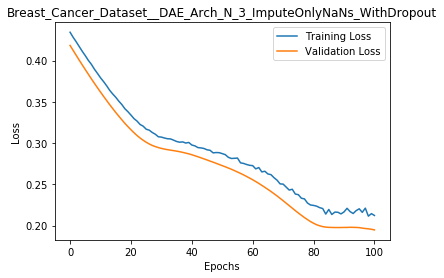

In [46]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")

In [47]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head()

,1,2,3,4,5,6,7,8,9,10
0,9.000000,5,8.000000,1,2.000000,3.000000,2,1.000000,5,4.000000
1,5.000000,1,1.000000,6,3.000000,1.000000,2,1.000000,1,2.000000
2,5.656042,6,4.737864,6,4.176023,1.000000,3,4.381116,1,3.216231
3,1.000000,1,1.000000,1,1.000000,1.655045,2,1.000000,1,2.000000
4,3.000000,1,1.000000,1,2.000000,1.000000,1,1.000000,1,2.000000


In [48]:
full_test_df.head() 

,1,2,3,4,5,6,7,8,9,10
50,9,5,8,1,2,3.0,2,1,5,4
444,5,1,1,6,3,1.0,2,1,1,2
43,5,6,5,6,10,1.0,3,1,1,4
139,1,1,1,1,1,NaN,2,1,1,2
692,3,1,1,1,2,1.0,1,1,1,2


In [49]:
test_df.head()

,1,2,3,4,5,6,7,8,9,10
50,9.0,5,8.0,1,2.0,3.0,2,1.0,5,4.0
444,5.0,1,1.0,6,3.0,1.0,2,1.0,1,2.0
43,NaN,6,NaN,6,NaN,1.0,3,NaN,1,NaN
139,1.0,1,1.0,1,1.0,NaN,2,1.0,1,2.0
692,3.0,1,1.0,1,2.0,1.0,1,1.0,1,2.0


### Model 5 DAE_Arch_N_3_ImputeOnlyNaNs_With10PercentDropout

In [50]:
import utils, dataset_module, Modelling

In [51]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
#DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
#BATCHES = DATAPOINTS/BATCH_SIZE
#VARIABLES  = len(trainset.variables()) #9


trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 3, input_dropout=0.1)

criterion = nn.MSELoss()
net = net.to(device) 


train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [52]:
model_name = "Breast_Cancer_Dataset__DAE_Arch_N_3_ImputeOnlyNaNs_With10PercentDropout"

In [53]:
train_model(0,101, net, model_name)

Epoch number:9 Loss: 0.4023


Epoch number:19 Loss: 0.3594


Epoch number:29 Loss: 0.3223


Epoch number:39 Loss: 0.3037


Epoch number:49 Loss: 0.2979


Epoch number:59 Loss: 0.2883


Epoch number:69 Loss: 0.2726


Epoch number:79 Loss: 0.2433


Epoch number:89 Loss: 0.2151


Epoch number:99 Loss: 0.2040


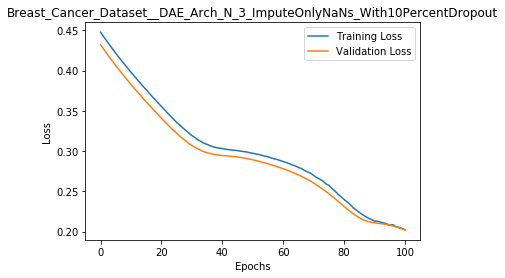

In [54]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")

In [55]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head()

,1,2,3,4,5,6,7,8,9,10
0,9.000000,5,8.000000,1,2.000000,3.000000,2,1.000000,5,4.000000
1,5.000000,1,1.000000,6,3.000000,1.000000,2,1.000000,1,2.000000
2,5.790087,6,4.940456,6,4.470651,1.000000,3,4.617906,1,3.194787
3,1.000000,1,1.000000,1,1.000000,2.271894,2,1.000000,1,2.000000
4,3.000000,1,1.000000,1,2.000000,1.000000,1,1.000000,1,2.000000


In [56]:
full_test_df.head() 

,1,2,3,4,5,6,7,8,9,10
50,9,5,8,1,2,3.0,2,1,5,4
444,5,1,1,6,3,1.0,2,1,1,2
43,5,6,5,6,10,1.0,3,1,1,4
139,1,1,1,1,1,NaN,2,1,1,2
692,3,1,1,1,2,1.0,1,1,1,2


In [57]:
test_df.head()

,1,2,3,4,5,6,7,8,9,10
50,9.0,5,8.0,1,2.0,3.0,2,1.0,5,4.0
444,5.0,1,1.0,6,3.0,1.0,2,1.0,1,2.0
43,NaN,6,NaN,6,NaN,1.0,3,NaN,1,NaN
139,1.0,1,1.0,1,1.0,NaN,2,1.0,1,2.0
692,3.0,1,1.0,1,2.0,1.0,1,1.0,1,2.0


### Model 7 DAE_Arch_N_3_ImputeOnlyNaNs_WithNoDropout

In [58]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
BATCHES = DATAPOINTS/BATCH_SIZE
VARIABLES  = len(trainset.variables()) #9


import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 3, input_dropout=0.0)

criterion = nn.MSELoss()
net = net.to(device) 

trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [59]:
model_name = "Breast_Cancer_Dataset__DAE_Arch_N_3_ImputeOnlyNaNs_WithNoDropout"

In [60]:
train_model(0,101, net, model_name)

Epoch number:9 Loss: 0.4448


Epoch number:19 Loss: 0.3959


Epoch number:29 Loss: 0.3502


Epoch number:39 Loss: 0.3129


Epoch number:49 Loss: 0.2922


Epoch number:59 Loss: 0.2771


Epoch number:69 Loss: 0.2523


Epoch number:79 Loss: 0.2212


Epoch number:89 Loss: 0.1996


Epoch number:99 Loss: 0.1888


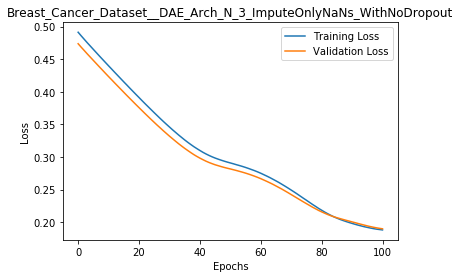

In [61]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")

In [62]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head(20)

,1,2,3,4,5,6,7,8,9,10
0,9.00000,5,8.000000,1,2.000000,3.000000,2,1.000000,5,4.000000
1,5.00000,1,1.000000,6,3.000000,1.000000,2,1.000000,1,2.000000
2,5.82409,6,4.884056,6,3.967297,1.000000,3,4.417671,1,3.308031
3,1.00000,1,1.000000,1,1.000000,0.928787,2,1.000000,1,2.000000
4,3.00000,1,1.000000,1,2.000000,1.000000,1,1.000000,1,2.000000
5,6.00000,1,3.000000,1,2.000000,1.000000,3,1.000000,1,2.000000
6,2.00000,1,1.000000,1,2.000000,1.000000,1,1.000000,1,2.000000
7,1.00000,1,1.000000,1,2.000000,1.000000,1,1.000000,1,2.000000
8,8.00000,6,4.000000,10,10.000000,1.000000,3,5.000000,1,4.000000
9,1.00000,2,3.000000,1,2.000000,1.000000,2,1.000000,1,2.000000


In [63]:
full_test_df.head(20) 

,1,2,3,4,5,6,7,8,9,10
50,9,5,8,1,2,3.0,2,1,5,4
444,5,1,1,6,3,1.0,2,1,1,2
43,5,6,5,6,10,1.0,3,1,1,4
139,1,1,1,1,1,NaN,2,1,1,2
692,3,1,1,1,2,1.0,1,1,1,2
219,6,1,3,1,2,1.0,3,1,1,2
141,2,1,1,1,2,1.0,1,1,1,2
198,1,1,1,1,2,1.0,1,1,1,2
312,8,6,4,10,10,1.0,3,5,1,4
394,1,2,3,1,2,1.0,2,1,1,2


In [64]:
test_df.head(20)

,1,2,3,4,5,6,7,8,9,10
50,9.0,5,8.0,1,2.0,3.0,2,1.0,5,4.0
444,5.0,1,1.0,6,3.0,1.0,2,1.0,1,2.0
43,NaN,6,NaN,6,NaN,1.0,3,NaN,1,NaN
139,1.0,1,1.0,1,1.0,NaN,2,1.0,1,2.0
692,3.0,1,1.0,1,2.0,1.0,1,1.0,1,2.0
219,6.0,1,3.0,1,2.0,1.0,3,1.0,1,2.0
141,2.0,1,1.0,1,2.0,1.0,1,1.0,1,2.0
198,1.0,1,1.0,1,2.0,1.0,1,1.0,1,2.0
312,8.0,6,4.0,10,10.0,1.0,3,5.0,1,4.0
394,1.0,2,3.0,1,2.0,1.0,2,1.0,1,2.0
